In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\s

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6E82-34BE

 Directory of C:\Users\KUMAR SANU\Assignment\Decision Tree

01-04-2021  14:23    <DIR>          .
01-04-2021  14:23    <DIR>          ..
31-03-2021  09:20    <DIR>          .ipynb_checkpoints
01-04-2021  14:23            57,399 Company.ipynb
07-03-2021  08:21            17,023 Company_Data.csv
01-04-2021  14:23            57,230 Fraud.ipynb
07-03-2021  08:21            21,837 Fraud_check.csv
07-03-2021  08:21             1,377 problem statement(company data).txt
07-03-2021  08:21               460 Problem_statement(Fraudcheck).txt
               6 File(s)        155,326 bytes
               3 Dir(s)  193,512,603,648 bytes free


In [3]:
fraud_df=pd.read_csv('Fraud_check.csv')
fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [43]:
label_encoder = preprocessing.LabelEncoder() #it will convert into number 
fraud_df['Urban']= label_encoder.fit_transform(fraud_df['Urban']) 

In [44]:
label_encoder = preprocessing.LabelEncoder() #it will convert into number 
fraud_df['Undergrad']= label_encoder.fit_transform(fraud_df['Undergrad']) 

In [45]:
label_encoder = preprocessing.LabelEncoder() #it will convert into number 
fraud_df['Marital.Status']= label_encoder.fit_transform(fraud_df['Marital.Status']) 

In [46]:
#Converting numerical Taxable.income into categrical 
fraud_df["TaxInc"] = pd.cut(fraud_df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [47]:
fraud_df["TaxInc"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [48]:
#Droping Taxable.Income from dataframe
FraudCheck = fraud_df.drop(columns=["Taxable.Income"])

In [50]:
FraudC_final = pd.concat([FCheck, FraudCheck["TaxInc"]], axis = 1)

In [51]:
FraudC_final

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [52]:
label_encoder = preprocessing.LabelEncoder() #it will convert into number 
FraudC_final['TaxInc']= label_encoder.fit_transform(FraudC_final['TaxInc']) 

In [53]:
FraudC_final

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


<AxesSubplot:>

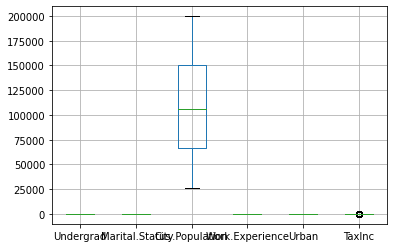

In [54]:
FraudC_final.boxplot() #no outlier in dataframe

In [55]:
FraudC_final.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
TaxInc,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


In [57]:
Fraud_df=FraudC_final.drop(['TaxInc'],axis=1)
Fraud_df.head(5)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [58]:
# Normalize
fraud=(Fraud_df - np.min(Fraud_df)) / (np.max(Fraud_df) - np.min(Fraud_df)).values
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0


In [59]:
x=fraud.iloc[:,0:4]
y=FraudC_final['TaxInc']

In [60]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Building Decision Tree Classifier using Entropy Criteria

In [61]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

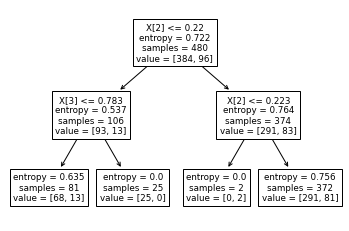

In [62]:
#PLot the decision tree
tree.plot_tree(model);


In [63]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    120
dtype: int64

In [64]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0
TaxInc,
0,92
1,28


In [66]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

In [67]:
    from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [68]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667